In [38]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [65]:
df = pd.read_csv("D:/Telco_customer_churn.csv")

In [67]:
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [69]:
X = df.drop('Churn', axis=1) 
y = df['Churn'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

C:\Users\indum\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

In [72]:
log_reg_preds = log_reg.predict(X_test)
knn_preds = knn.predict(X_test)
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, log_reg_preds))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_reg_preds))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_preds))
print("KNN Classification Report:")
print(classification_report(y_test, knn_preds))

Logistic Regression Confusion Matrix:
[[1009    0]
 [   0  400]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

KNN Confusion Matrix:
[[897 112]
 [351  49]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.89      0.79      1009
           1       0.30      0.12      0.17       400

    accuracy                           0.67      1409
   macro avg       0.51      0.51      0.48      1409
weighted avg       0.60      0.67      0.62      1409



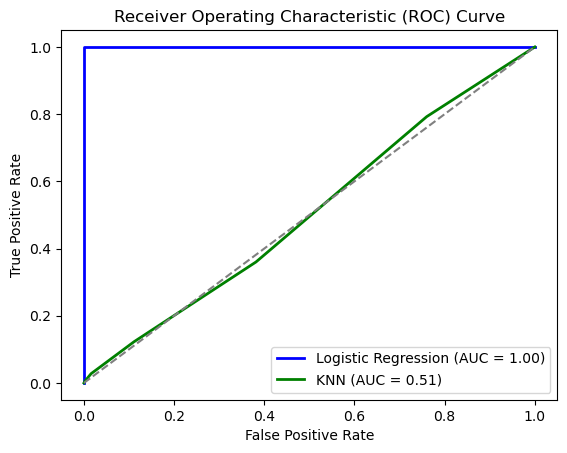

In [74]:
log_reg_fpr, log_reg_tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
log_reg_auc = auc(log_reg_fpr, log_reg_tpr)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
knn_auc = auc(knn_fpr, knn_tpr)
plt.plot(log_reg_fpr, log_reg_tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {log_reg_auc:.2f})')
plt.plot(knn_fpr, knn_tpr, color='green', lw=2, label=f'KNN (AUC = {knn_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [81]:
print(f'Logistic Regression AUC: {log_reg_auc:.2f}')
print(f'KNN AUC: {knn_auc:.2f}')

Logistic Regression AUC: 1.00
KNN AUC: 0.51
